In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
ds= pd.read_csv(r'D:\Road to ML\datasets\yield_df.csv')
ds.drop('Unnamed: 0',axis=1,inplace=True)
ds.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [54]:
ds.drop_duplicates(inplace=True)
ds.duplicated().sum()

np.int64(0)

In [55]:
ds['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

### As you can see index and length don't match Run a simple command to fix that 

In [56]:
ds.reset_index(drop=True,inplace=True)

In [57]:
ds['average_rain_fall_mm_per_year']


0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
25927     657.0
25928     657.0
25929     657.0
25930     657.0
25931     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

# Find total yield for each country

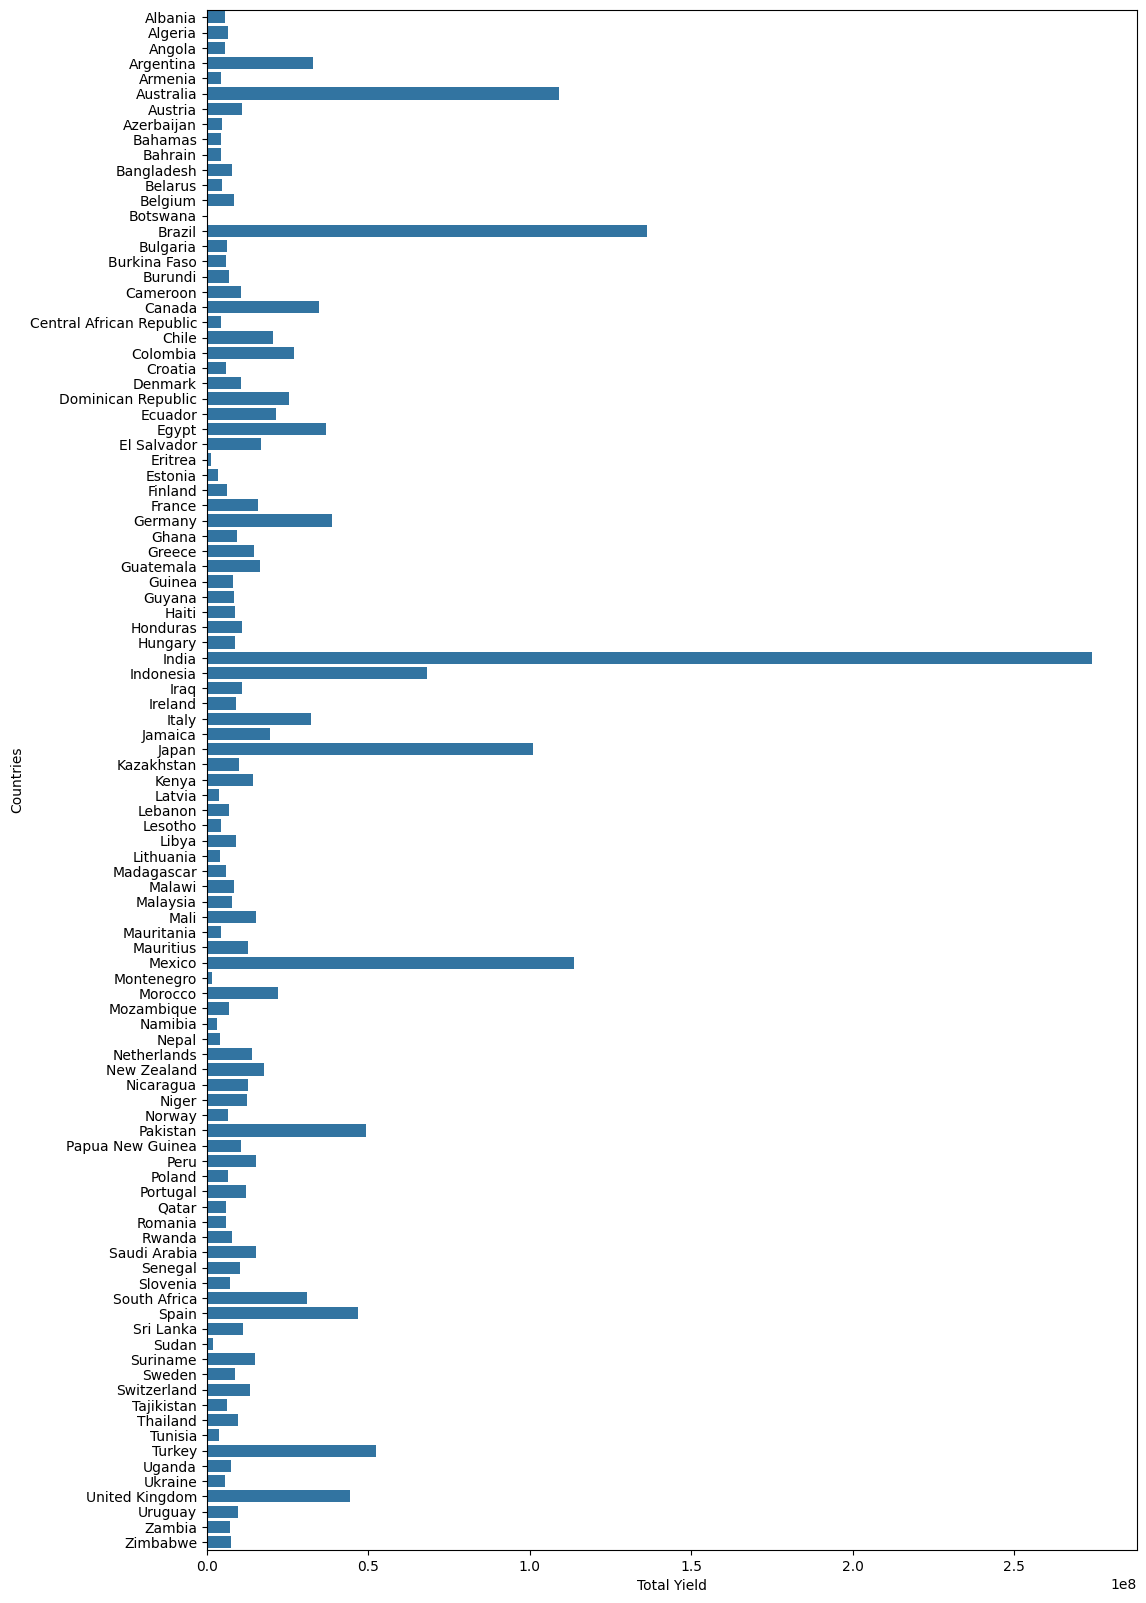

In [58]:
countries=ds['Area'].unique()
yield_per_country=[]
for country in countries:
    yield_per_country.append(ds[ds['Area']==country]['hg/ha_yield'].sum())


plt.figure(figsize=(12,20))
sns.barplot(x=yield_per_country,y=countries)
plt.xlabel('Total Yield')
plt.ylabel('Countries')
plt.show()

# Yield of each crop 

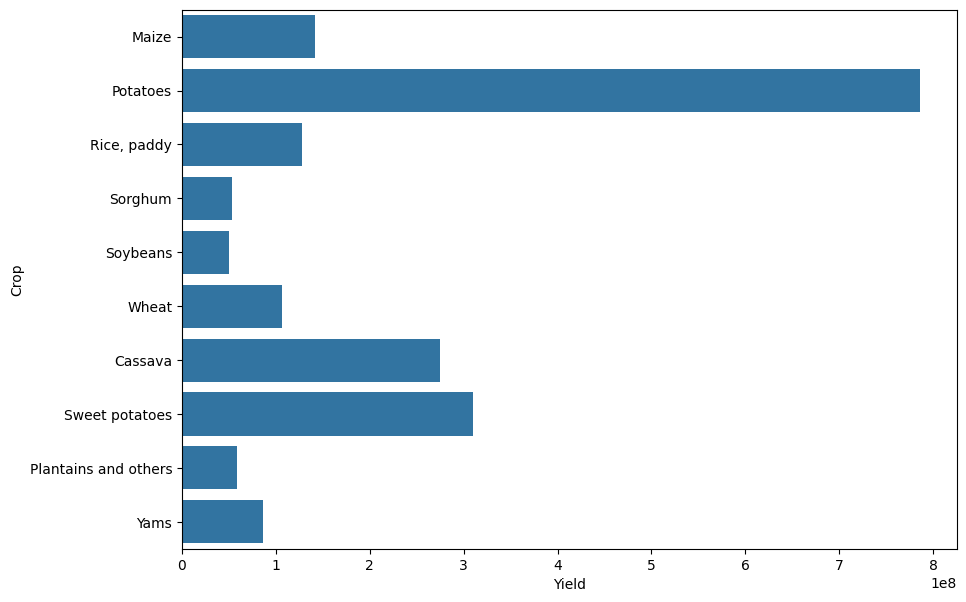

In [59]:
crops = ds['Item'].unique()
yield_per_crop=[]
for crop in crops:
    yield_per_crop.append(ds[ds['Item']==crop]['hg/ha_yield'].sum())

plt.figure(figsize=(10,7))
sns.barplot(x=yield_per_crop,y=crops)
plt.xlabel('Yield')
plt.ylabel('Crop')
plt.show()

# Rearrange columns and perform train test split

In [60]:
col=['Area','Year','Item','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','hg/ha_yield']
ds=ds[col]
ds.head()

,Area,Year,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,1990,Maize,1485.0,121.0,16.37,36613
1,Albania,1990,Potatoes,1485.0,121.0,16.37,66667
2,Albania,1990,"Rice, paddy",1485.0,121.0,16.37,23333
3,Albania,1990,Sorghum,1485.0,121.0,16.37,12500
4,Albania,1990,Soybeans,1485.0,121.0,16.37,7000


In [61]:
from sklearn.model_selection  import train_test_split
x=ds.drop('hg/ha_yield',axis=1)
y=ds['hg/ha_yield']

X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=42)



# Encode catagorical features and then perform scaling

In [62]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

OHE=OneHotEncoder(drop='first',sparse_output=False)
SS=StandardScaler()

preprocessor=ColumnTransformer(
    transformers=[
        ('Encode',OHE,[0,2]),
        ('Scaling',SS,[1,3,4,5])
    ],remainder='passthrough'
)

X_train_trans=preprocessor.fit_transform(X_train)
X_test_trans=preprocessor.transform(X_test)


# Train Models

In [63]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error

models={
    'lr':LinearRegression(),
    'ls':Lasso(),
    'rg':Ridge(),
    'knr':KNeighborsRegressor(),
    'dtr1':DecisionTreeRegressor(),
}

for name,model in models.items():
    model.fit(X_train_trans,Y_train)
    y_pred=model.predict(X_test_trans)


    print( name,"have mean squared error" ,mean_absolute_error(Y_test,y_pred),
          "and have r2 Score of ", r2_score(Y_test,y_pred))
    

lr have mean squared error 29920.826320609216 and have r2 Score of  0.7486567945060605


D:\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e+10, tolerance: 1.482e+10
  model = cd_fast.enet_coordinate_descent(


ls have mean squared error 29907.604370718243 and have r2 Score of  0.7485842229351427
rg have mean squared error 29875.80078127387 and have r2 Score of  0.7485388180308393
knr have mean squared error 4852.788008482745 and have r2 Score of  0.9823870837354384
dtr1 have mean squared error 4028.5550414497784 and have r2 Score of  0.9785945231898908


# Select best model

In [64]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_trans,Y_train)
y_pred=dtr.predict(X_test_trans)
r2_score(Y_test,y_pred)

0.9773508466607252

# Check Predictions

In [65]:
def prediction(Aera,Year,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp):
    user_input=np.array([[Aera,Year,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp]])
    user_input=preprocessor.transform(user_input)
    result =dtr.predict(user_input).reshape(1,-1)
    return result

In [66]:
Area='Zimbabwe'
Year=1991
Item='Maize'
average_rain_fall_mm_per_year=657.0
pesticides_tonnes=6753.00
avg_temp=20.95

result=prediction(Area,Year,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp)
print(result)


[[14400.]]


D:\ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
D:\ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
ds.sample(5)

,Area,Year,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
11131,India,1998,Potatoes,1083.0,49157.00,26.12,146020
5885,Chile,2007,"Rice, paddy",1522.0,9830.72,12.31,50663
7379,Ecuador,2009,Maize,2274.0,9666.87,22.42,22003
23436,Sri Lanka,1992,Plantains and others,1712.0,2144.31,26.26,131963
16434,Libya,1990,Wheat,56.0,87.00,20.53,12317


# Save model and Preprocessor

In [69]:
import pickle
pickle.dump(dtr,open('DTR.pkl', 'wb'))
pickle.dump(preprocessor,open('Preprocessor.pkl','wb'))

In [70]:
import sklearn
sklearn.__version__

'1.5.2'